Theoretical best time, 496
Theoretical worst time,15346.0
Theoretical average time,7921.0
Experimenal best time, 6019
Experimenal worst time,10018
Experimenal average time,7922


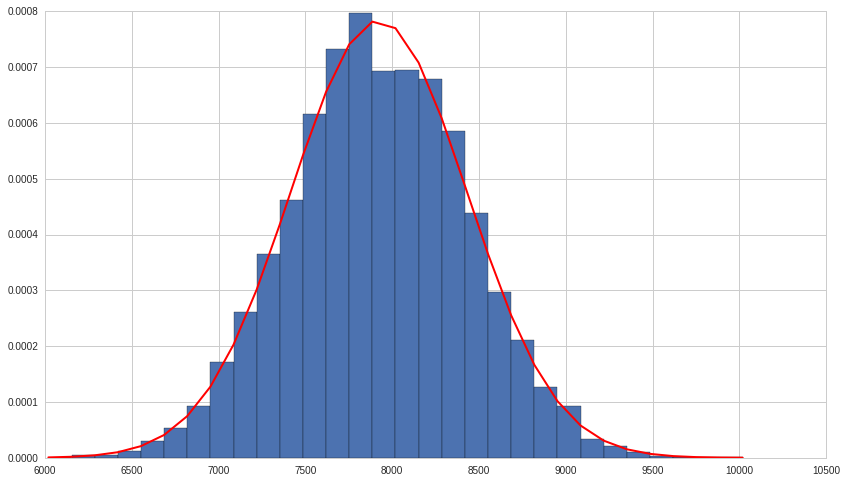

In [8]:


import random
import numpy as np
import matplotlib.pyplot as plt
def randomPerm(n):
    v=[]
    for i in range(n):
        v.append(i+1)
    for i in range(len(v)-1):
        j = random.randint(i, len(v)-1)
        aux = v[i]
        v[i] = v[j]
        v[j] = aux
    return v

def isortSteps(a):
    v = []
    for i in range(len(a)):
        v.append(a[i])
        
    steps = 0
    for i in range(1,len(v)):
        x = v[i]
        j = i-1
        while (j > -1) and (v[j] > x):
            v[j+1] = v[j]
            j = j -1
            steps = steps + 3  #3 pasos
        steps = steps + 1      # 1 paso
        v[j+1] = x
        steps = steps + 4       #4 pasos
    steps = steps + 1           #1 paso
    return steps


n = 100
runs = 10000
array =[]
sum = 0
min = n**3
max = 0

for i in range(runs):
    t = isortSteps(randomPerm(n))
    array.append(t)
    if t < min :
       min = t
    if t > max :
       max = t
    sum = sum + t
    
array.sort()
array_n = np.array(array)
mu, sigma = np.mean(array_n),np.std(array_n)

cuenta, cajas, ignorar = plt.hist(array_n, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

print 'Theoretical best time, ' + str(5*n - 4) 
print 'Theoretical worst time,' + str((3.0/2.0)*n**2 + (7.0/2.0)*n - 4)
print 'Theoretical average time,' + str((3.0/4.0)*n**2 + (17.0/4.0)*n - 4)
print 'Experimenal best time, ' + str(min)
print 'Experimenal worst time,' + str(max)
print 'Experimenal average time,' + str(sum/runs)